The goal of this project is to cluster penguin species based on various features such as physical measurements (e.g., bill length, bill depth, flipper length, body mass). By applying K-Means Clustering, we aim to discover distinct groups of penguins that share similar characteristics, and potentially identify patterns that differentiate species of penguins

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [49]:
df = pd.read_csv('penguins.csv')

In [50]:
df.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE


In [51]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [53]:
df.drop(columns=['sex'], inplace=True)

In [54]:
df['culmen_depth_mm'].fillna(X['culmen_depth_mm'].mean(), inplace=True)
df['culmen_length_mm'].fillna(X['culmen_length_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(X['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(X['body_mass_g'].mean(), inplace=True)

C:\Users\91770\AppData\Local\Temp\ipykernel_488\2702702026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['culmen_depth_mm'].fillna(X['culmen_depth_mm'].mean(), inplace=True)
C:\Users\91770\AppData\Local\Temp\ipykernel_488\2702702026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [55]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

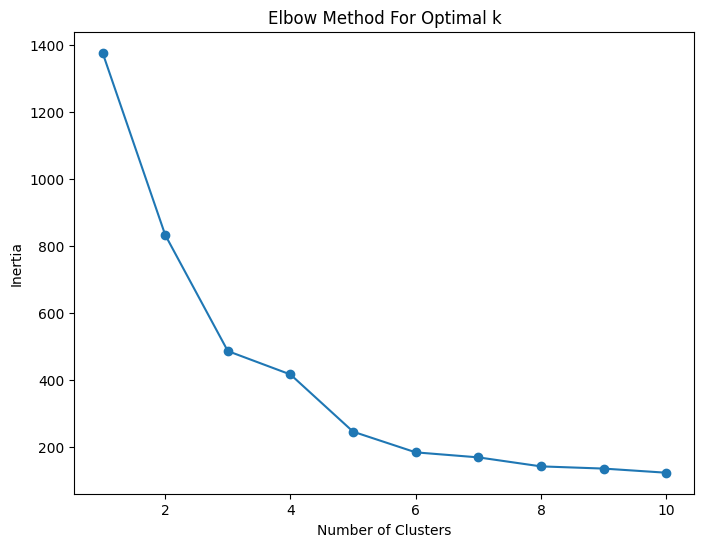

In [57]:

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [60]:
kmeans = KMeans(n_clusters=4)
df['cluster'] = kmeans.fit_predict(X_scaled)


df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.10000,18.70000,181.00000,3750.000000,1
1,39.50000,17.40000,186.00000,3800.000000,1
2,40.30000,18.00000,195.00000,3250.000000,1
3,43.92193,17.15117,214.01462,4201.754386,2
4,36.70000,19.30000,193.00000,3450.000000,1


In [61]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4671312017543347
